In [1]:
from shutil import copyfile
import os

In [2]:
folder_name = "Scientific Papers"
src = folder_name + "/Text.pdf"
dst = "Science Summary.pdf"
copyfile(src, dst)

'Science Summary.pdf'

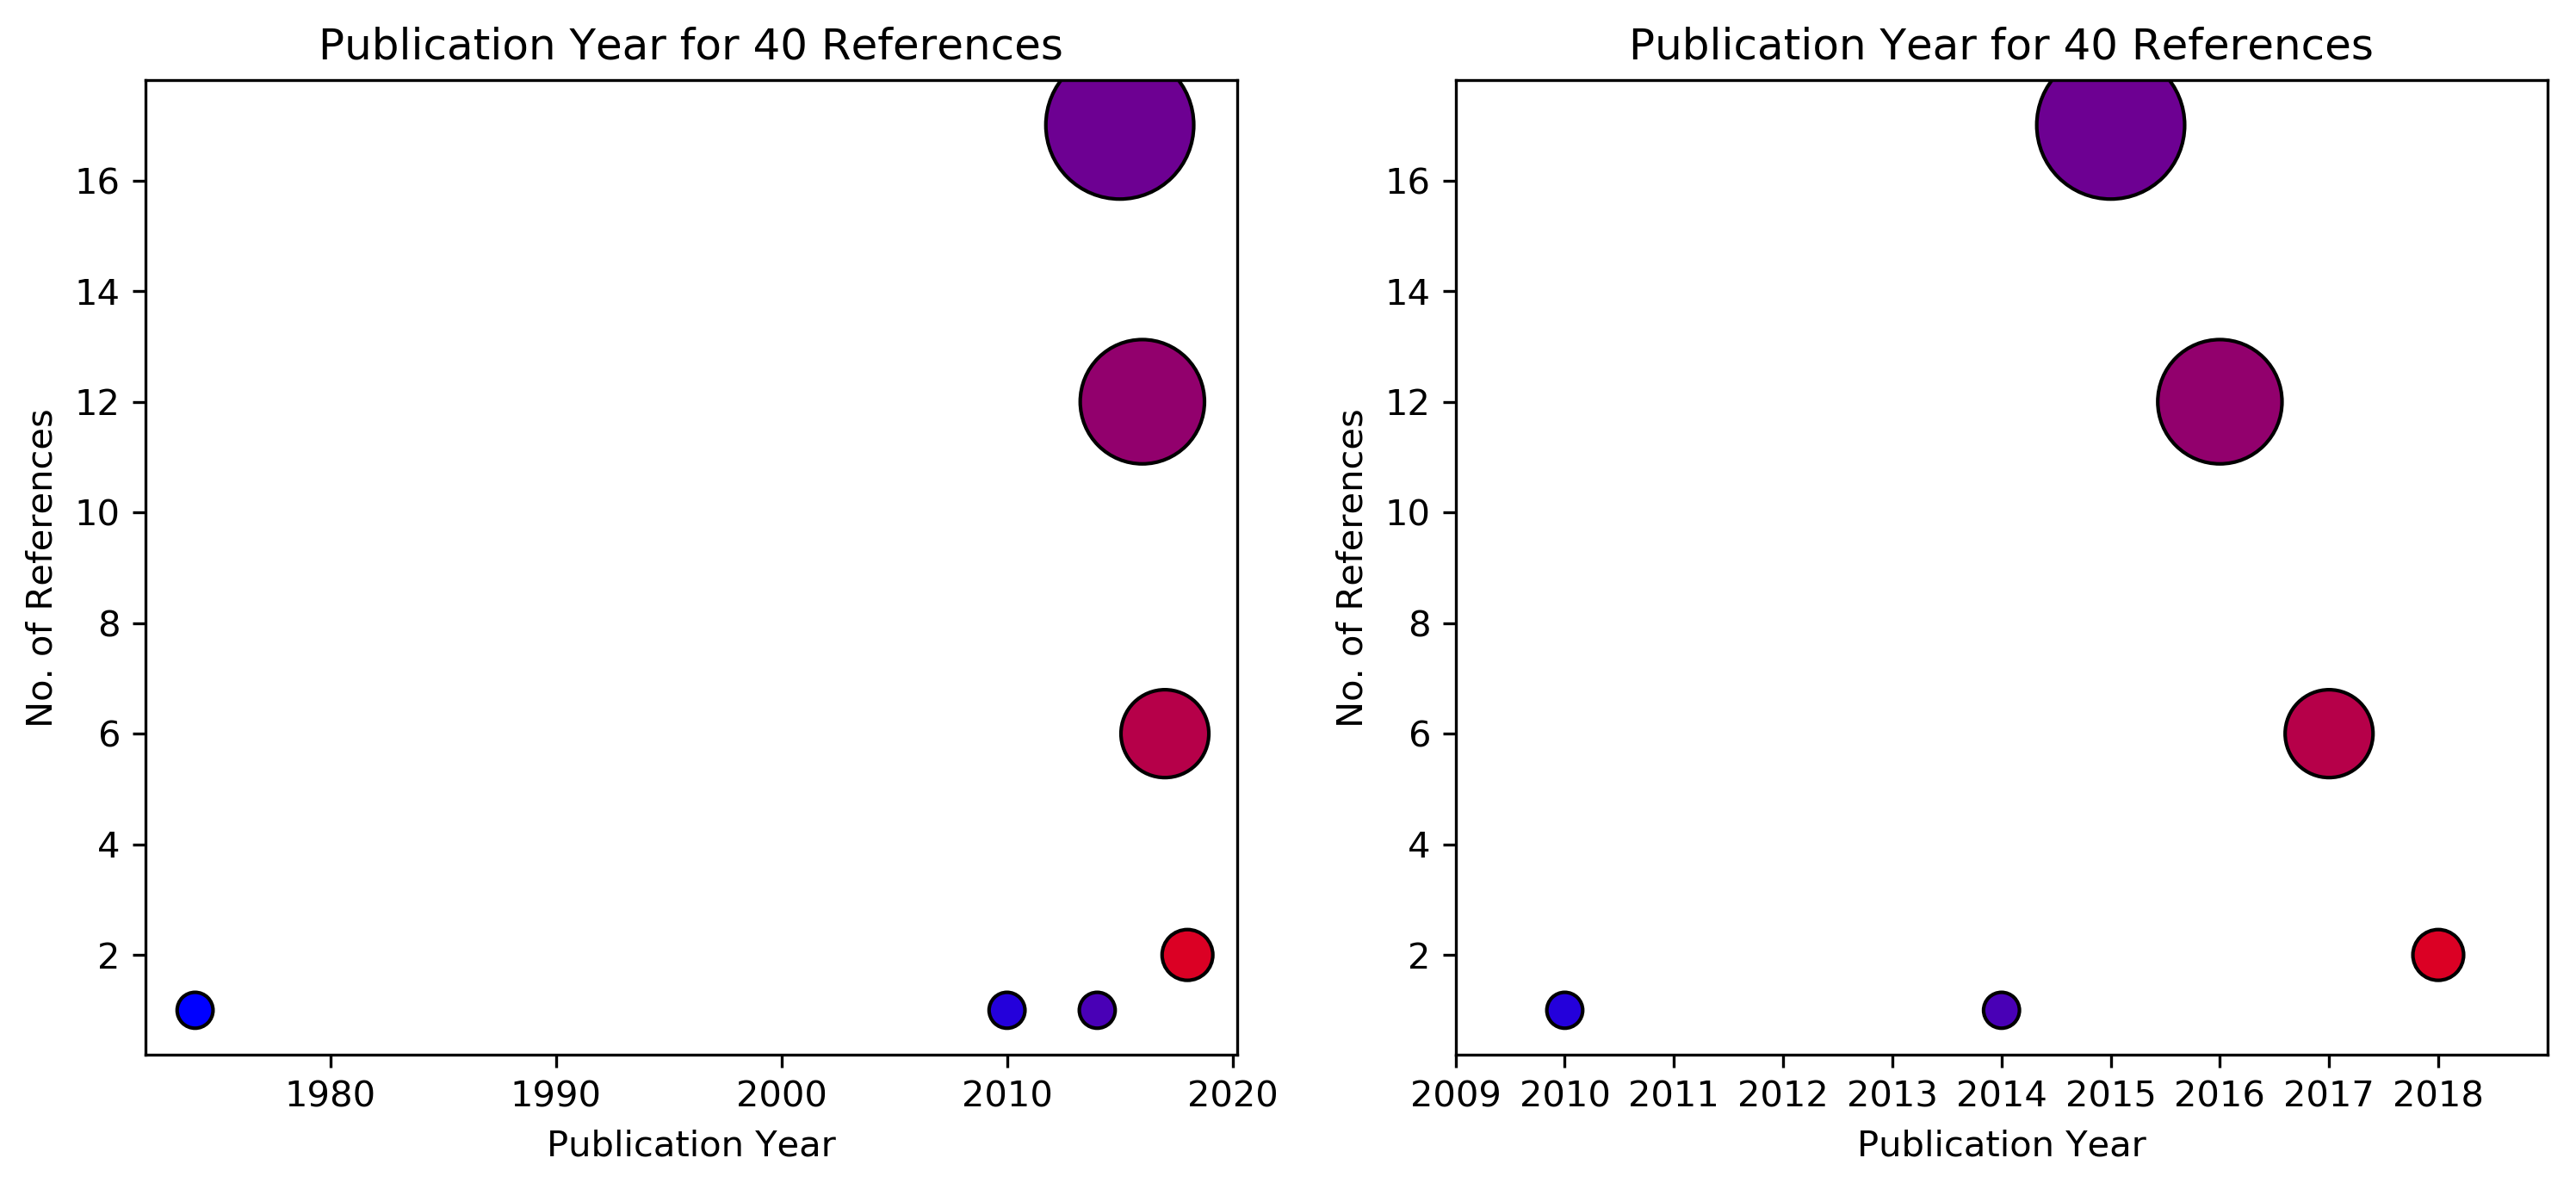

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Collect reference years from .bib file and plot
def collect_reference_years():
    refs = folder_name + "/References.bib"
    years = []; count_list = []
    
    # Read in text from the bibliography file
    with open(refs, "r") as myfile: 
        lines = myfile.readlines()
    myfile.close() 
    
    # List the unique years
    for i in range(len(lines)):
        line = lines[i]
        if len(line) > 8 and len(line) < 30:    
            for j in range(len(line)-10):
                if line[j] == "y":
                    if line[j+1] == "e":
                        if line[j+2] == "a":
                            if line[j+3] == "r":
                                if line[j+4] == "=":
                                    years.append(int(line[j+6:j+10]))
    unique_years = sorted(set(years))
    
    # Count the number of ooccurances for each unique year
    for i in range(len(unique_years)):
        year = unique_years[i]; count = 0;
        for j in range(len(years)) :
            if year == years[j]:
                count = count + 1; 
        count_list.append(count)
    
    size = []
    for i in range(len(count_list)):
        size.append(100*count_list[i])
        
    color_edge = []; color_face = []; c1 = 1; 
    for i in range(len(size)):
        a = [c1,0,c1]; 
        a[0] = 1-a[0];
        c1 = c1-1/len(size)
        color_edge.append([0,0,0]); color_face.append(a)
    
    fig = plt.figure(figsize=(12, 5), dpi=300)
    
    ax = fig.add_subplot(121)
    plt.scatter(unique_years, count_list, s=size, edgecolors=color_edge, facecolors=color_face)
    plt.title('Publication Year for %i References' % sum(count_list))
    plt.xlabel('Publication Year')
    plt.ylabel('No. of References')
    
    ax = fig.add_subplot(122)
    plt.scatter(unique_years, count_list, s=size, edgecolors=color_edge, facecolors=color_face)
    plt.title('Publication Year for %i References' % sum(count_list))
    plt.xlabel('Publication Year')
    plt.ylabel('No. of References')
    x_min = 2009; x_max = x_min+10; plt.xlim(x_min,x_max); plt.xticks(np.arange(x_min, x_max, 1))
    fig.savefig('Figures/references_by_publication_year.jpg')
    
    plt.show()


collect_reference_years()

In [4]:
# Adding a reference to the Refeences.bib
import csv

def add_reference(text):
    refs = "Scientific Papers/References.bib"
    
    with open(refs, "a") as myfile: 
        myfile.write("\n")
        for i in range(len(text)):  
            if i == 0 or i == len(text)-1:
                space = "";
            else: 
                space = "   "       
            myfile.write(space + text[i] + "\n")
            
        myfile.write("\n")
    myfile.close() 
            
    return("Reference Added.")
     

In [5]:
latham2017exploring = ["@article{latham2017exploring,",
     "    title={EXPLORING CUMULATIVE DISADVANTAGE, TELOMERE LENGTH, AND BREAST CANCER AMONG BLACK AND WHITE WOMEN},"
    "author={Latham-Mintus, K and Weathers, T and Irby-Shasanmi, A and Bigatti, SM and Storniolo, A and Robison, L and Telomere Laboratory, I},",
      "journal={Innovation in Aging},",
  "volume={1},",
  "number={suppl\_1},",
  "pages={1338--1338},",
  "year={2017},",
  "publisher={Oxford University Press US}",
"}"]

thorvaldsdottir2017telomere = ["@article{thorvaldsdottir2017telomere,",
  "title={Telomere length is predictive of breast cancer risk in BRCA2 mutation carriers},",
  "author={Thorvaldsdottir, Birna and Aradottir, Margret and Stefansson, Olafur A and Bodvarsdottir, Sigridur K and Eyfj{\"o}rd, Jorunn E},",
  "journal={Cancer Epidemiology and Prevention Biomarkers},",
  "pages={cebp--0946},",
  "year={2017},",
    "publisher={AACR}",                                                                                                                     
    "}"]

rasgon2017insulin = ["@article{rasgon2017insulin,",
  "title={Insulin resistance and telomere length in treatment of depressive disorders},",
  "author={Rasgon, N and McEwen, B and Lin, KW},",
  "journal={European Psychiatry},",
  "volume={41},",
  "pages={S61--S62},",
  "year={2017},",
  "publisher={Elsevier}",
"}"]


In [6]:
#print(add_reference(rasgon2017insulin))

In [7]:
os.chdir(folder_name)
os.system("latexmk -pdf Text.tex")
os.system("latexmk -pdf Text.tex")
os.system("latexmk -pdf -bibtex Text.tex")
os.system("latexmk -pdf Text.tex")
os.system("latexmk -pdf Text.tex")
os.system("latexmk -pdf -bibtex Text.tex")

0